In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Wine data
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None


# Normalization techniques

## TanH
$x'_{i,n} = \frac{1}{2}\left[\tanh[{0.01(\frac{x_{i,n-\mu^{H}_i}}{\sigma^H_i})}] +1\right]$

In [4]:
def z_score(data):
    scaler = StandardScaler()
    data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1]) #all except categorical 
    return data
        
def tanh_norm(data):
        m = np.mean(df.iloc[:,:-1], axis=0) # array([16.25, 26.25])
        std = np.std(df.iloc[:,:-1], axis=0) # array([17.45530005, 22.18529919])

        tanh_df = 0.5 * (np.tanh(0.01 * ((df.iloc[:,:-1] - m) / std)) + 1)
        return tanh_df

def min_max():
    pass
def pareto_scaling():
    pass
def variable_sability_scaling():
    pass
def load_data(dataset:str):
    if dataset == "wine":
        w = pd.read_csv(r"C:\Users\johan\Documents\GitHub\kth_private\project_course\datasets\wine\winequality-white.csv",delimiter=";")
        r  = pd.read_csv(r"C:\Users\johan\Documents\GitHub\kth_private\project_course\datasets\wine\winequality-red.csv",delimiter=";")
        r['color'] = 'red'
        w['color'] = 'white'
        df = r.append(w)
        df = df.sample(frac=1).reset_index(drop=True)
    else:
        raise NameError("Not implemented yet")
    return df
class Normalizator():
    def __init__(self,dataset:str):
        """
        Class that reads data and performs normalization methods
        Args:
            - dataset : str of the type of dataset to use, not that this also needs to be implemented as a separete field in load_data
        Methods:
            - normalize: function to normalize the data given method
            - boxplot: creates subplots of all variables
            
        """
        
        self.dataset = dataset
        self.df = load_data(self.dataset)
    def normalize(self,method="zscore",reset=False):
        # just to make sure the data is not tampered with before normalization
        if reset:
            self.df = load_data('wine') 
        if method == "zscore": 
            self.df = z_score(self.df)
        elif method == "tanh":
            self.df = tanh_norm(self.df) 
        elif method == "zscore":
            self.df = z_score(self.df)
        elif method == "zscore":
            self.df = z_score(self.df)
    def boxplots(self):
        fig, axes = plt.subplots(3,4,figsize=(15,15))
        for i,el in enumerate(list(self.df.columns.values)[:-1]):
            a = self.df.boxplot(el, ax=axes.flatten()[i])

        #fig.delaxes(axes[1,1]) # remove empty subplot
        plt.tight_layout() 

        plt.show()

In [5]:
obj = Normalizator(dataset="wine")
obj.df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


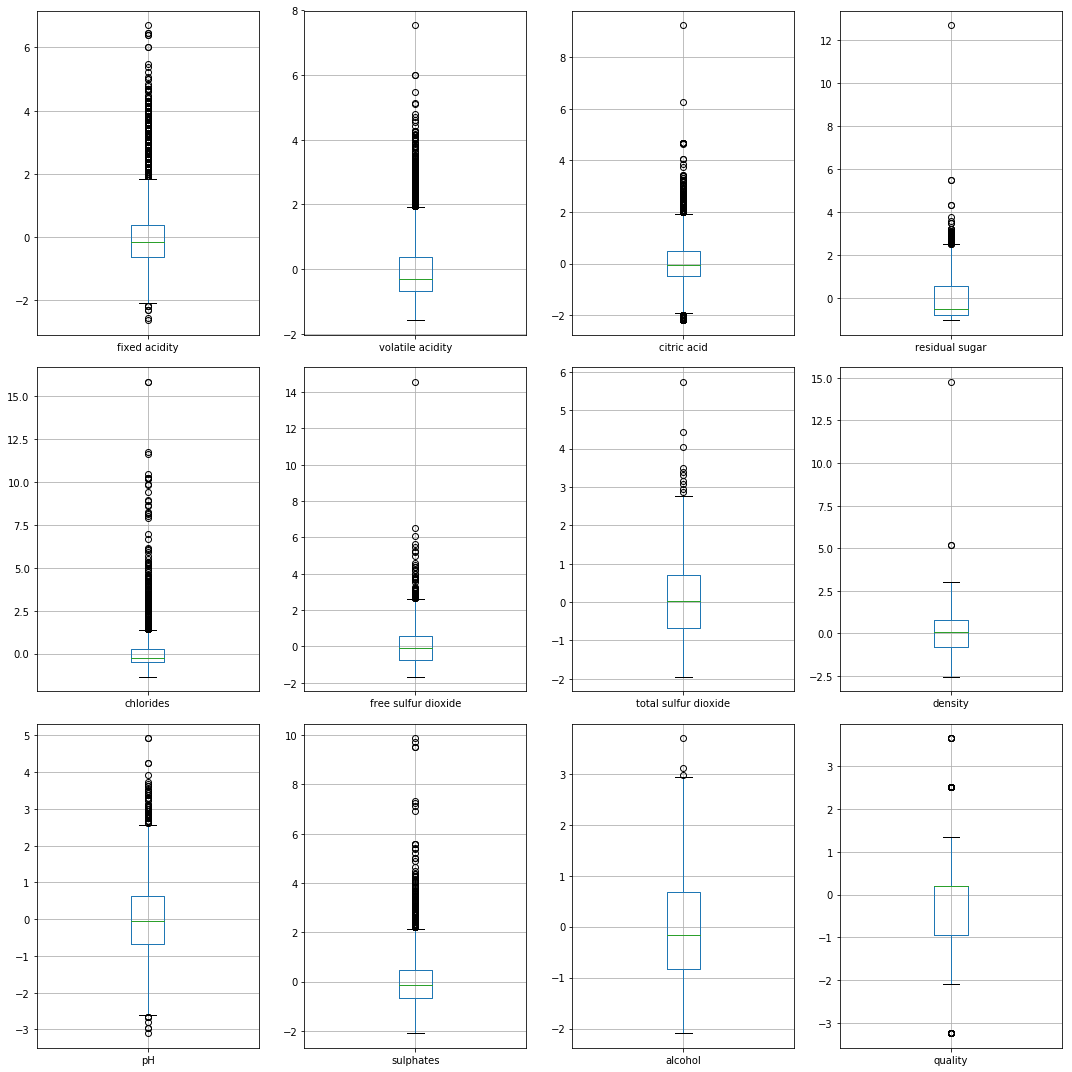

In [50]:
obj.normalize(method="zscore",reset=True)
obj.boxplots()